<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: Mariya Mansurova, Analyst & developer in Yandex.Metrics team. Translated by Ivan Zakharov, ML enthusiast. <br>This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #9 (demo)
## <center> Time series analysis

**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis) + [solution](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis-solution).**

**Fill cells marked with "Your code here" and submit your answers to the questions through the [web form](https://docs.google.com/forms/d/1UYQ_WYSpsV3VSlZAzhSN_YXmyjV7YlTP8EYMg8M8SoM/edit).**

In [1]:
import os
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

print(__version__)  # need 1.9.0 or greater
init_notebook_mode(connected=True)


def plotly_df(df, title=""):
    data = []

    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode="lines", name=column)
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

4.14.3


## Data preparation

In [2]:
df = pd.read_csv("../../data/wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [3]:
df.shape

(383, 7)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [4]:
df.date = pd.to_datetime(df.date)

In [5]:
plotly_df(df.set_index("date")[["count"]])

***Because plotpy diagrams could not be visible via git, I'll do some static copies.***

In [6]:
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

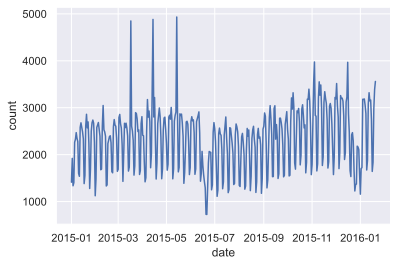

In [7]:
sns.lineplot(x = 'date', y = 'count', data=df);

In [8]:
from fbprophet import Prophet

In [9]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


***Following the approach in the materials, separating timeline into part for training the model, and the part for evaluation of the quality (as 30-days period is given above).***

In [10]:
train_q1 = df[:-predictions]
train_q1.shape

(353, 2)

**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- 4947
- 3426
- 5229
- 2744

In [11]:
model_q1 = Prophet()
model_q1.fit(train_q1);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
test_q1 = df[-predictions:]
test_q1.drop('y', axis = 1, inplace = True)
test_q1.shape

(30, 1)

In [13]:
# So, the data of interest in validation part
test_q1

,ds
346,2015-12-22
345,2015-12-23
348,2015-12-24
347,2015-12-25
350,2015-12-26
349,2015-12-27
352,2015-12-28
351,2015-12-29
353,2015-12-30
354,2015-12-31


In [14]:
res_q1 = model_q1.predict(test_q1)
res_q1[res_q1['ds']=='2016-01-20']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
29,2016-01-20,3002.104708,2996.638355,3835.519602,2979.877032,3026.443465,425.562161,425.562161,425.562161,425.562161,425.562161,425.562161,0.0,0.0,0.0,3427.66687


***The exact prediction, out of all resulted parameters is 'yhat'. At the 20.01.2016 the expected number of visits is 3427.67, which is rounded to 3428. It is differs a bit from the given answers, perhaps due to the different versions of the python modules. The closest one is answer 2.***

Estimate the quality of the prediction with the last 30 points.

In [15]:
f = model_q1.make_future_dataframe(periods=predictions)

In [16]:
res_to_plot = model_q1.predict(f)

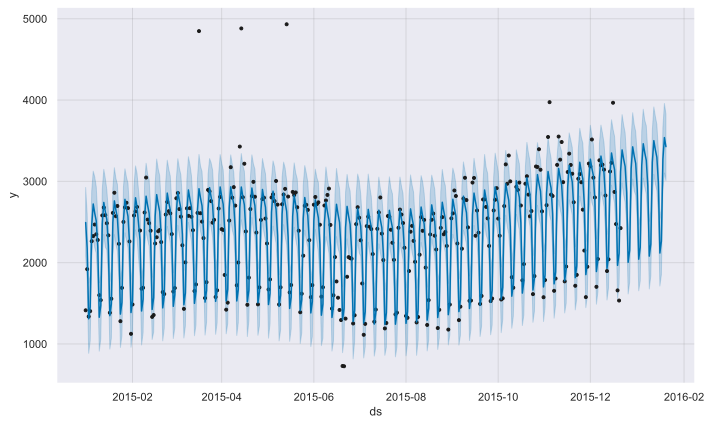

In [17]:
model_q1.plot(res_to_plot);

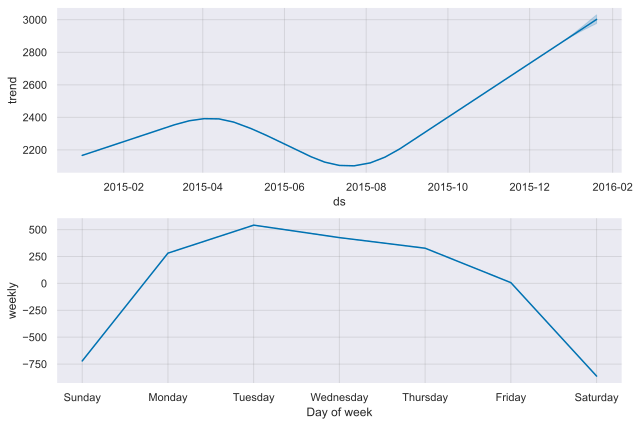

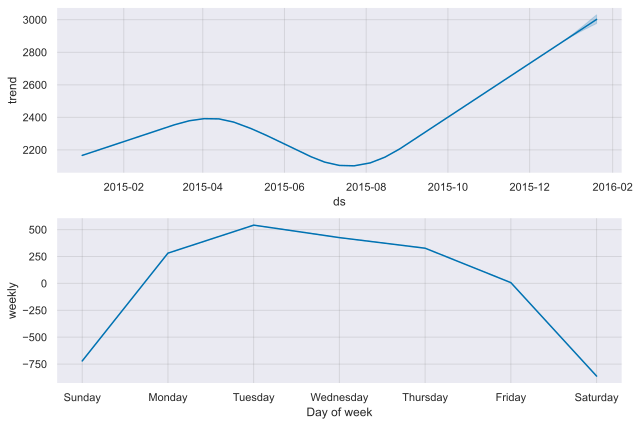

In [18]:
model_q1.plot_components(res_to_plot)

**<font color='red'>Question 2:</font> What is MAPE equal to?**

- 34.5
- 42.42
- 5.39
- 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- 355
- 4007
- 600
- 903

***Using helper functions from materials***

In [19]:
def make_comparison_dataframe(historical, forecast):

    return forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(
        historical.set_index("ds")
    )

def calculate_forecast_errors(df, prediction_size):
    df = df.copy()

    df["e"] = df["y"] - df["yhat"]
    df["p"] = 100 * df["e"] / df["y"]

    predicted_part = df[-prediction_size:]

    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

    return {"MAPE": error_mean("p"), "MAE": error_mean("e")}

In [20]:
copmare_df = make_comparison_dataframe(df, res_to_plot)

In [21]:
calculate_forecast_errors(copmare_df, 30)

{'MAPE': 34.54881666061871, 'MAE': 600.7914203141124}

***So, MAPE is 34.55 (answer 2, question 2), while MAE is 600.79 (answer 3, question 3).***

## Predicting with ARIMA

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

plt.rcParams["figure.figsize"] = (15, 10)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- Series is stationary, p_value = 0.107
- Series is not stationary, p_value = 0.107
- Series is stationary, p_value = 0.001
- Series is not stationary, p_value = 0.001

In [37]:
round(sm.tsa.stattools.adfuller(train_q1["y"])[1], 3)

0.107

***p-value here is used to support/reject hypothesis. In Dickey-Fuller test hypothesis are:***
- H0: if cannot be rejected, it suggests the time series has a unit root, meaning it is non-stationary.
- H1: if H0 is rejected, then it suggests the time series does not have a unit root, meaning it is stationary.

***p-value for hypothesis:***
- p-value > 0.05 -> cannot reject H0
- p-value <= 0.05 -> H0 is rejects, so H1.


***In this case, p-value = .107 > .05. It leads to a conclusion, that the series is non-stationary. Thus, the answer is 2.***

***It also can be verified visually (or even be looked via mean and std of log transformed dataset). But p-value and hypothesis deals with the task in more easier fashion.***

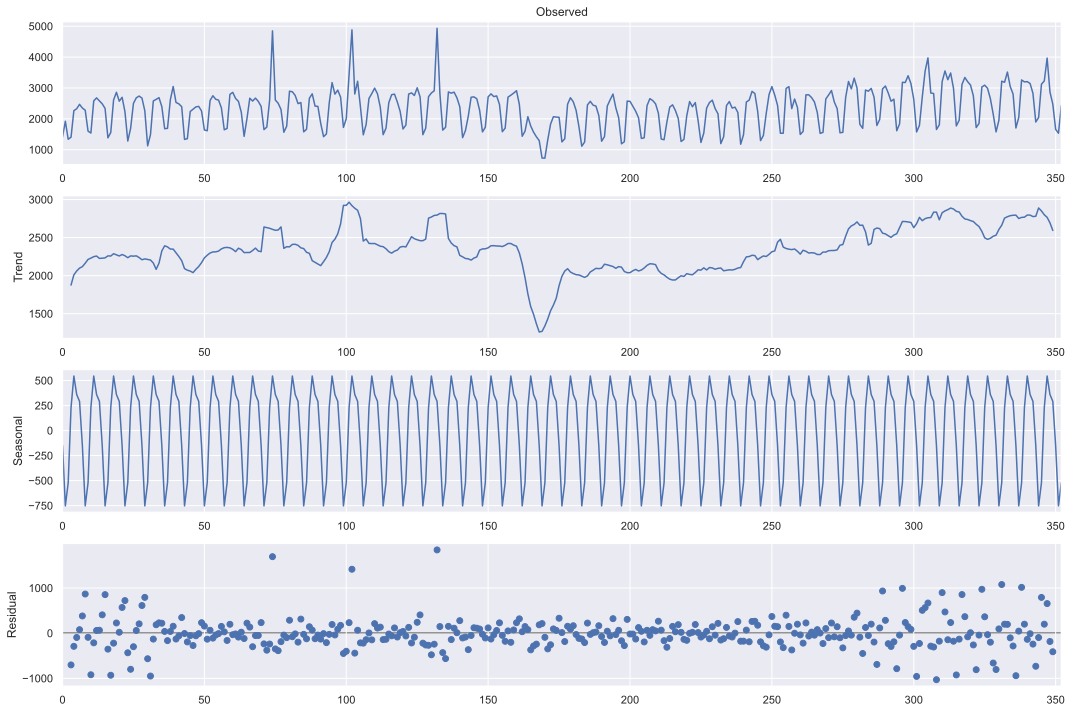

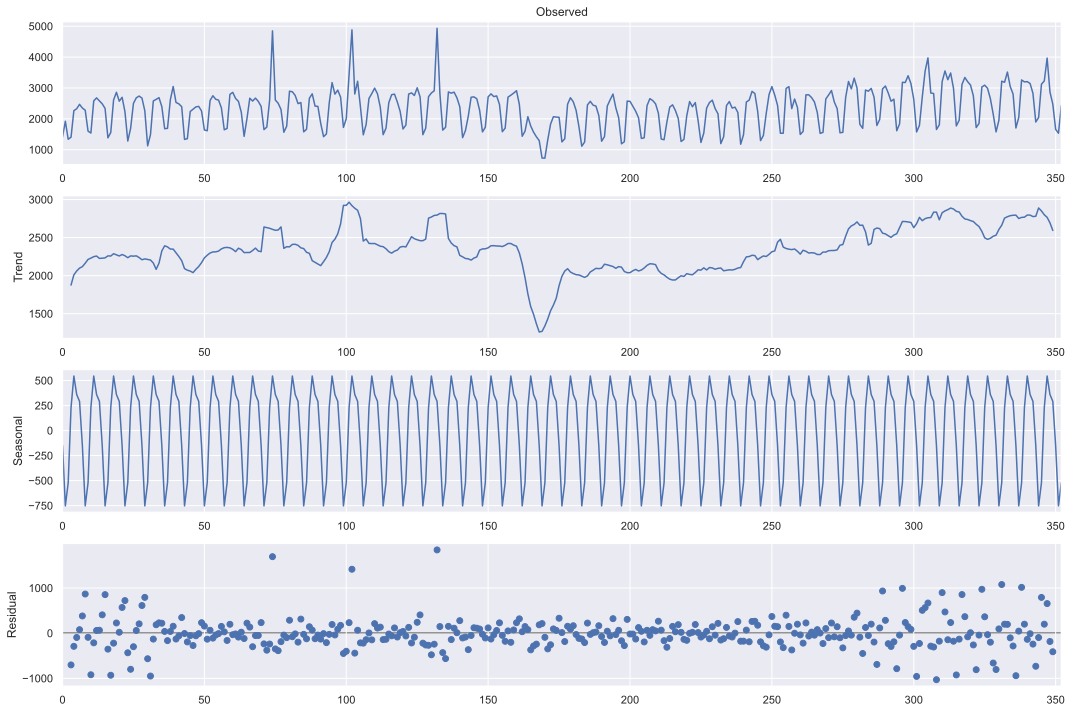

In [38]:
sm.tsa.seasonal_decompose(train_q1["y"].values, freq=7).plot()


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1

***Basically, to answer this question, it is enough to check these 4 parameters set:***

In [72]:
a = [1, 0, 0, 2, 3, 1]
b = [2, 1, 1, 2, 3, 1]
c = [1, 1, 1, 2, 3, 1]
d = [0, 0, 0, 2, 3, 1]

parameters_list_1 = [a, b, c, d]

***And it is quite simple, extending function from materials.***

In [49]:
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")

def optimizeSARIMA(parameters_list):

    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        #print(param)
        
        try:
            model = sm.tsa.statespace.SARIMAX(
                train_q1["y"],
                order=(param[5], param[1], param[3]),
                seasonal_order=(param[4], param[0], param[2], 7),
            ).fit(disp=-1)
        #except (ValueError, np.linalg.LinAlgError):
        except:
            continue
        aic = model.aic
        #print(aic)

        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ["parameters", "aic"]   
    result_table = result_table.sort_values(by="aic", ascending=True).reset_index(
        drop=True
    )
    return result_table

In [73]:
res = optimizeSARIMA(parameters_list_1)

  0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
res

,parameters,aic
0,"[2, 1, 1, 2, 3, 1]",4988.978105
1,"[1, 1, 1, 2, 3, 1]",5019.555903
2,"[1, 0, 0, 2, 3, 1]",5022.312524
3,"[0, 0, 0, 2, 3, 1]",5183.923326


***The resulted AIC (which is Akaike information criterion) is used purely for making a choice between several models (as well as set of other criterions, such as Hannan–Quinn information criterion - HQC or Bayesian information criterion - BIC). As AIC is an estimator of prediction error, then the smaller value is better, so from all these models with different parameters - the best is with parameters [2, 1, 1, 2, 3, 1] (D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1). Thus, the answer is 2.***

***From a real perspective, the initial values of parameters first of all have to be determined, e.g. visually, by analyzing autocorrelation plot(s). Then, many models can be tested (as initial ranges are given, making assumptions about values of the parameters can be omitted):***

In [52]:
D = range(0, 3)
d = range(0, 2)
Q = range(0, 2)
q = range(2, 4)
P = range(2, 4)
p = range(0, 2)

In [53]:
from itertools import product

parameters = product(D, d, Q, q, P, p)
parameters_list = list(parameters)
len(parameters_list)

96

In [55]:
res_big = optimizeSARIMA(parameters_list)

  0%|          | 0/96 [00:00<?, ?it/s]

***Funny enough, there are some models, better than proposed by solutions for this data series.***

In [57]:
res_big.head()

,parameters,aic
0,"(0, 0, 0, 2, 2, 0)",10.000000
1,"(0, 1, 1, 3, 3, 1)",148.047362
2,"(0, 0, 1, 3, 2, 0)",2058.361482
3,"(2, 1, 1, 2, 3, 0)",4961.632628
4,"(2, 1, 1, 3, 3, 1)",4965.678170


In [58]:
res['parameters'][0]

[2, 1, 1, 2, 3, 1]

In [59]:
best_task_model = sm.tsa.statespace.SARIMAX(
                train_q1["y"],
                order=(res['parameters'][0][5], 
                       res['parameters'][0][1], 
                       res['parameters'][0][3]),
                seasonal_order=(res['parameters'][0][4], 
                                res['parameters'][0][0], 
                                res['parameters'][0][2], 7),
            ).fit(disp=-1)

In [61]:
print(best_task_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  353
Model:             SARIMAX(1, 1, 2)x(3, 2, [1], 7)   Log Likelihood               -2486.489
Date:                             Fri, 16 Jul 2021   AIC                           4988.978
Time:                                     09:24:46   BIC                           5019.562
Sample:                                          0   HQIC                          5001.167
                                             - 353                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9981      0.058    -17.151      0.000      -1.112      -0.884
ma.L1          0.3428      

***All resulted coefficients are statistically significant.***

***Solutions also offers a suggestion to do a Box-Cox transformation, and also build SARIMAX. It was breifly mentioned in the materials, that Box-Cox transformation is one of the ways to fight non-stationarity (and it is a case for the given data).***

In [63]:
import scipy.stats

In [64]:
scipy.stats.boxcox?

In [65]:
train_q1["boxcox_transformed_y"], lmbda = scipy.stats.boxcox(train_q1["y"])

In [66]:
train_q1.head()

,ds,y,boxcox_transformed_y
81,2015-01-01,1414,276.458939
80,2015-01-02,1920,346.274243
79,2015-01-03,1338,265.435365
78,2015-01-04,1404,275.017684
77,2015-01-05,2264,390.902181


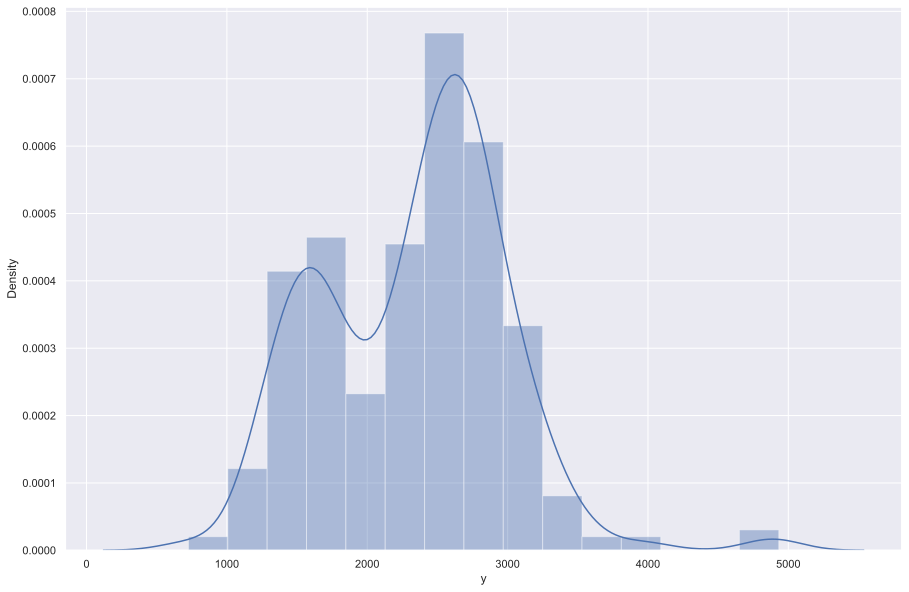

In [68]:
sns.distplot(train_q1["y"]);

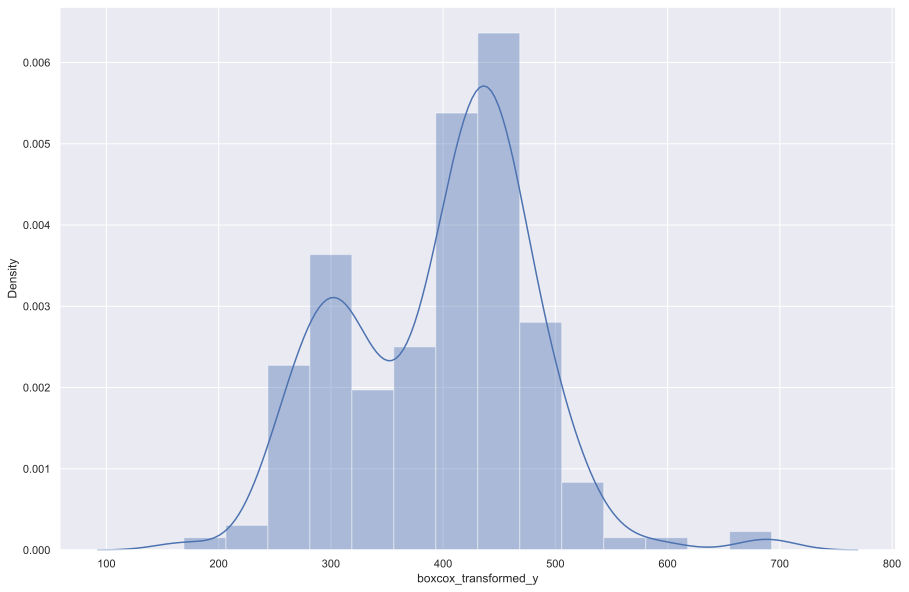

In [69]:
sns.distplot(train_q1["boxcox_transformed_y"]);

In [70]:
lmbda

0.7328410888410415

In [71]:
def optimizeSARIMA_boxcox(parameters_list):

    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        #print(param)
        
        try:
            model = sm.tsa.statespace.SARIMAX(
                train_q1["boxcox_transformed_y"],
                order=(param[5], param[1], param[3]),
                seasonal_order=(param[4], param[0], param[2], 7),
            ).fit(disp=-1)
        #except (ValueError, np.linalg.LinAlgError):
        except:
            continue
        aic = model.aic
        #print(aic)

        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ["parameters", "aic"]   
    result_table = result_table.sort_values(by="aic", ascending=True).reset_index(
        drop=True
    )
    return result_table

In [74]:
res_boxcox = optimizeSARIMA_boxcox(parameters_list_1)

  0%|          | 0/4 [00:00<?, ?it/s]

In [75]:
res_boxcox

,parameters,aic
0,"[2, 1, 1, 2, 3, 1]",3534.540192
1,"[1, 0, 0, 2, 3, 1]",3556.880030
2,"[1, 1, 1, 2, 3, 1]",3557.850584
3,"[0, 0, 0, 2, 3, 1]",3674.916001


***The best model out of 4 proposed did not changed, but the errors, shown by AIC are decreased, which is quite good.***

In [77]:
best_task_model_1 = sm.tsa.statespace.SARIMAX(
                train_q1["boxcox_transformed_y"],
                order=(res_boxcox['parameters'][0][5], 
                       res_boxcox['parameters'][0][1], 
                       res_boxcox['parameters'][0][3]),
                seasonal_order=(res_boxcox['parameters'][0][4], 
                                res_boxcox['parameters'][0][0], 
                                res_boxcox['parameters'][0][2], 7),
            ).fit(disp=-1)

In [79]:
print(best_task_model_1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                boxcox_transformed_y   No. Observations:                  353
Model:             SARIMAX(1, 1, 2)x(3, 2, [1], 7)   Log Likelihood               -1759.270
Date:                             Fri, 16 Jul 2021   AIC                           3534.540
Time:                                     09:37:37   BIC                           3565.125
Sample:                                          0   HQIC                          3546.729
                                             - 353                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4770      0.118      4.059      0.000       0.247       0.707
ma.L1         -0.9903      

***Some of the coefficients, however, became statistically insignificant.***